## Environment框架和python的域

1. 考虑以下的代码，在双层for循环中使用同一个变量名称；并在循环结束后调用循环变量

In [ ]:
for i in range(3):
    for i in range(2):
        print(i)
print(f"final i is: {i}")

* 实际只创建了一个变量，在两层循环中被反复修改
* python中for循环会创建一个全局变量（相对于循环所在的域来说，一个在非循环域的最低层的全局变量），因此最后print(i)不会报错 not defined
* 并没有陷入死循环，即并不会因为内层将 i 反复修改为 0/1 而导致外层达不到 2
* 具体过程可实验：
> https://pythontutor.com/composingprograms.html#mode=edit

下图展示了其中的关键步骤

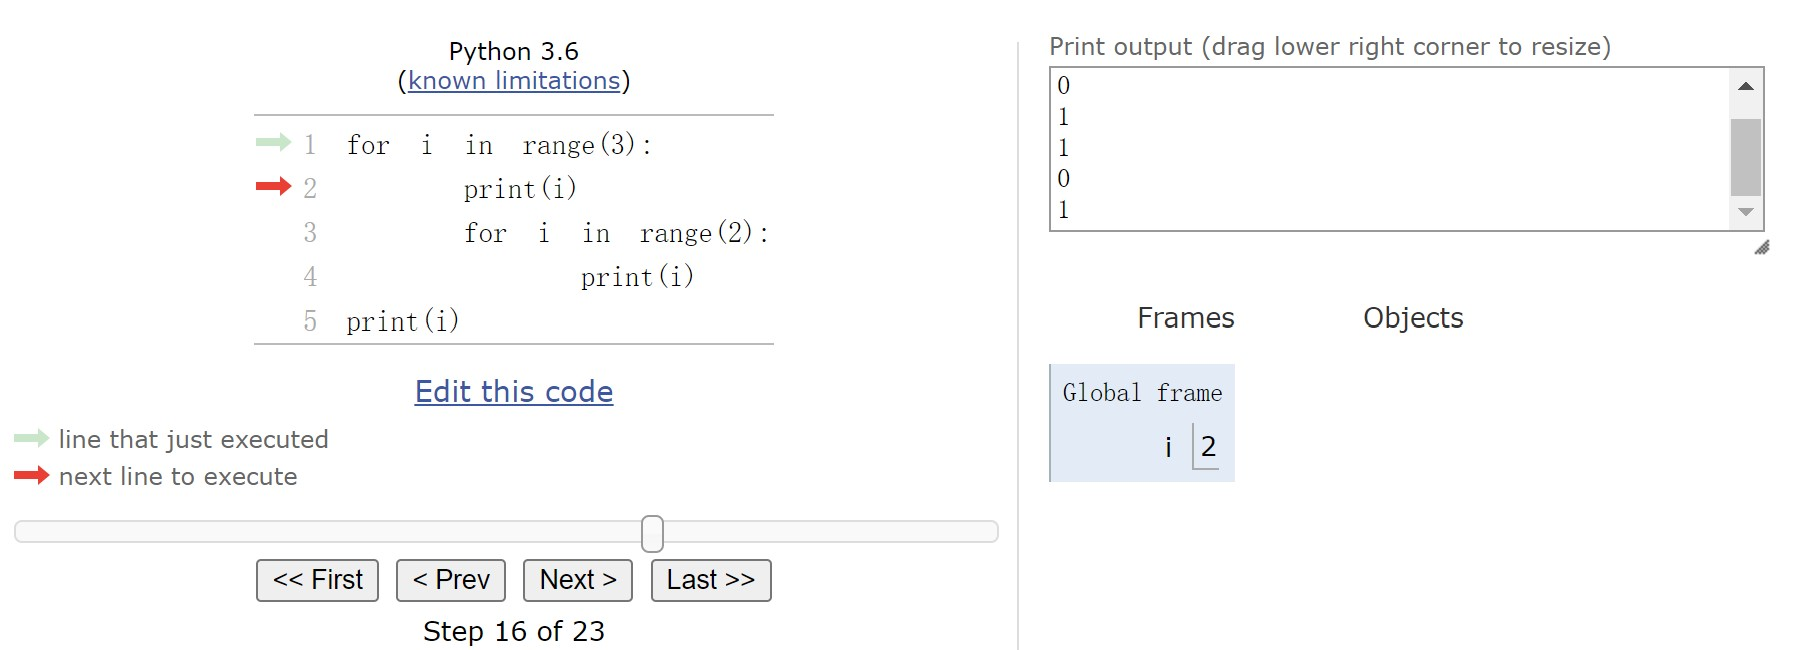

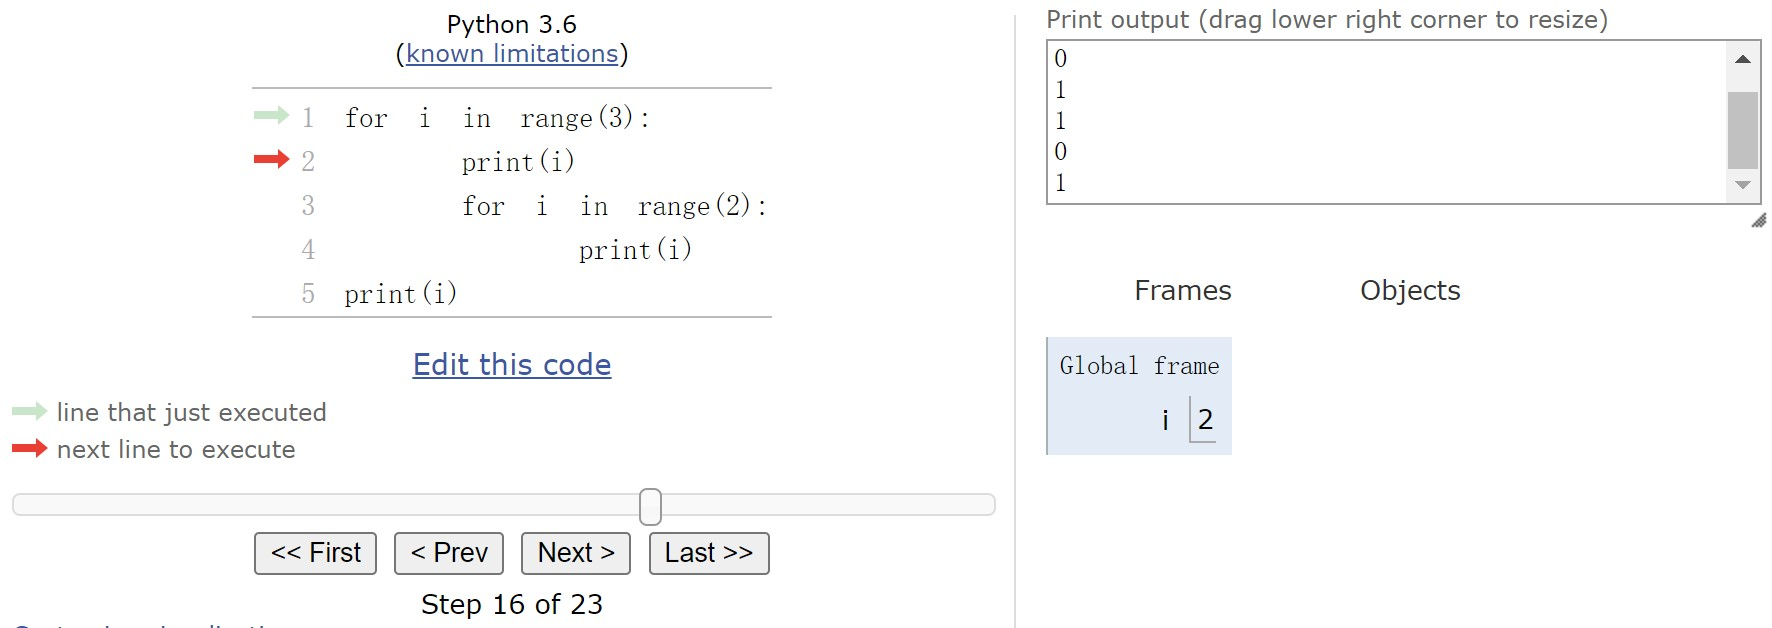

* 注意到外层第3次进入循环的时候，进入第3次循环之前global frame中的 i 刚被赋值为 1，而在进入时直接被赋为 2
* 具体在于 for range() 的机制，是由迭代器在range()中进行循环迭代，并在每次进入循环时将range()中迭代到的值赋给循环变量 i

2. 考虑以下代码，在函数外层和类外层的 print() 会报错 not defined

* for循环创建的变量不会在循环结束时销毁，其范围可以超出多个for循环的域（如下面 外层 "_" 循环的域），但并不会超出函数和类的域

In [ ]:
def f():
    for _ in range(1):
        for a in range(1):
            print(a)
        print(a)
    print(a)
f()
print(a)

class C():
    for b in range(1):
        print(b)
    print(b)
print(b)

3. 函数调用时的框架范围

不止要考虑函数的名称，更要考虑的是：

否在同一框架内、在谁的框架内（父框架parent）、在哪个框架中调用的

**函数f1内调用其他函数f2，将在f1的<u>父框架内寻找</u>**

In [1]:
def f():    # parent = Global
    return 0
def g():    # parent = Global
    print(f())
def h():
    def f():    # parent = h
        return 1
    g()

h() # 最终调用 h(), 真实的结果是 return 0

0


流程和框架如下图：

* 在全局框架 Global 中构建三个函数 f，g，h
* 调用 h()，**进入h内部框架**
* 在 h 框架内创建了新函数 f，因此**并没有将 Global 中的 f 重写替换**，而是新定义了 **h 框架内的函数 f**
* 调用 g，进入g的框架 Global
* 此时在 g 的框架内调用 f，**系统将在 g 的父框架（Global）中寻找并调用 f**
* 于是找到 Global 中定义的 f 并return 0，而不是 g 框架中定义的 f
> 如果去掉 Global 中定义的 f，系统会报错，说明只会在调用的父框架中寻找目标函数

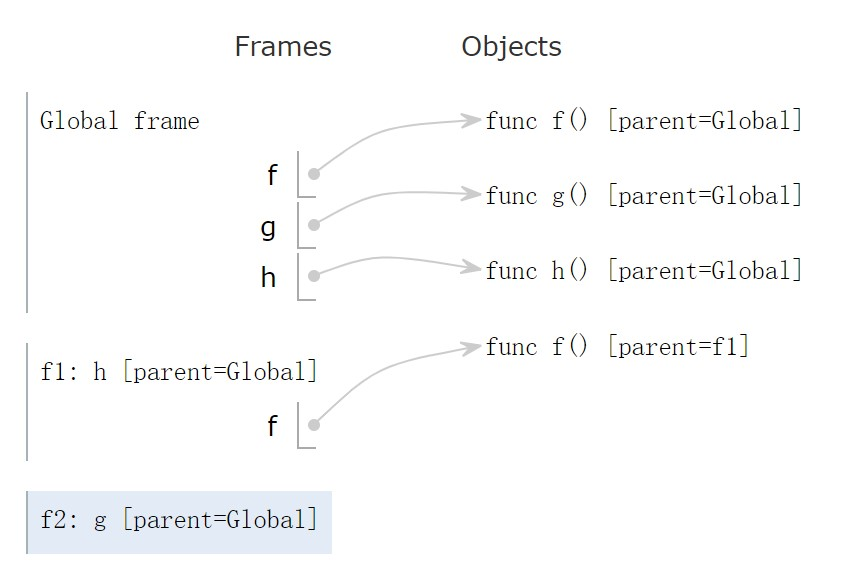



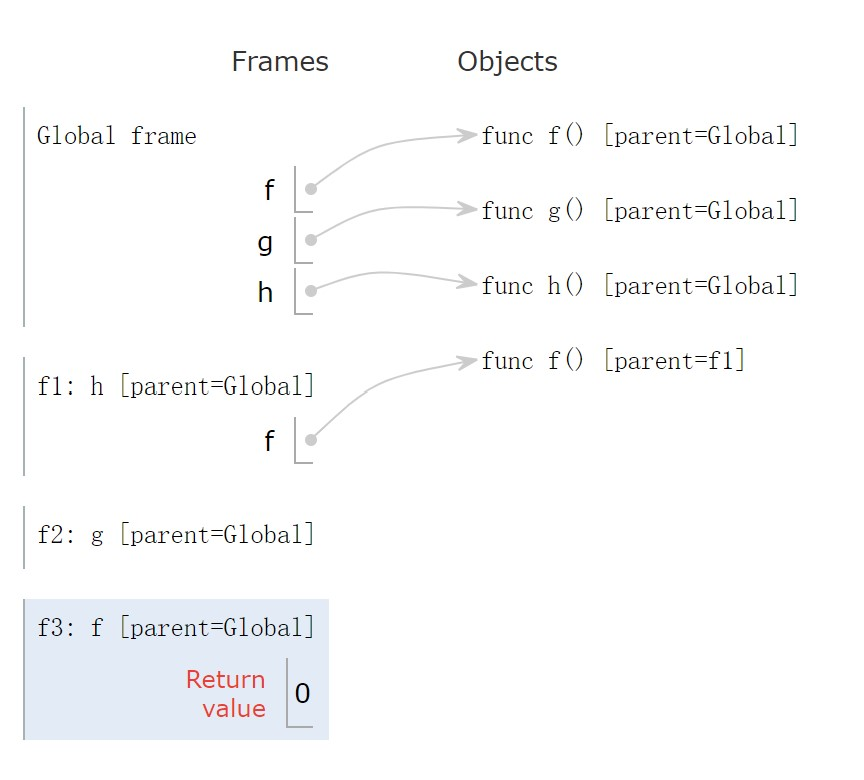